In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")

In [3]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# Analysis and Visualisation

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [93]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [83]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


## Distribution Plot

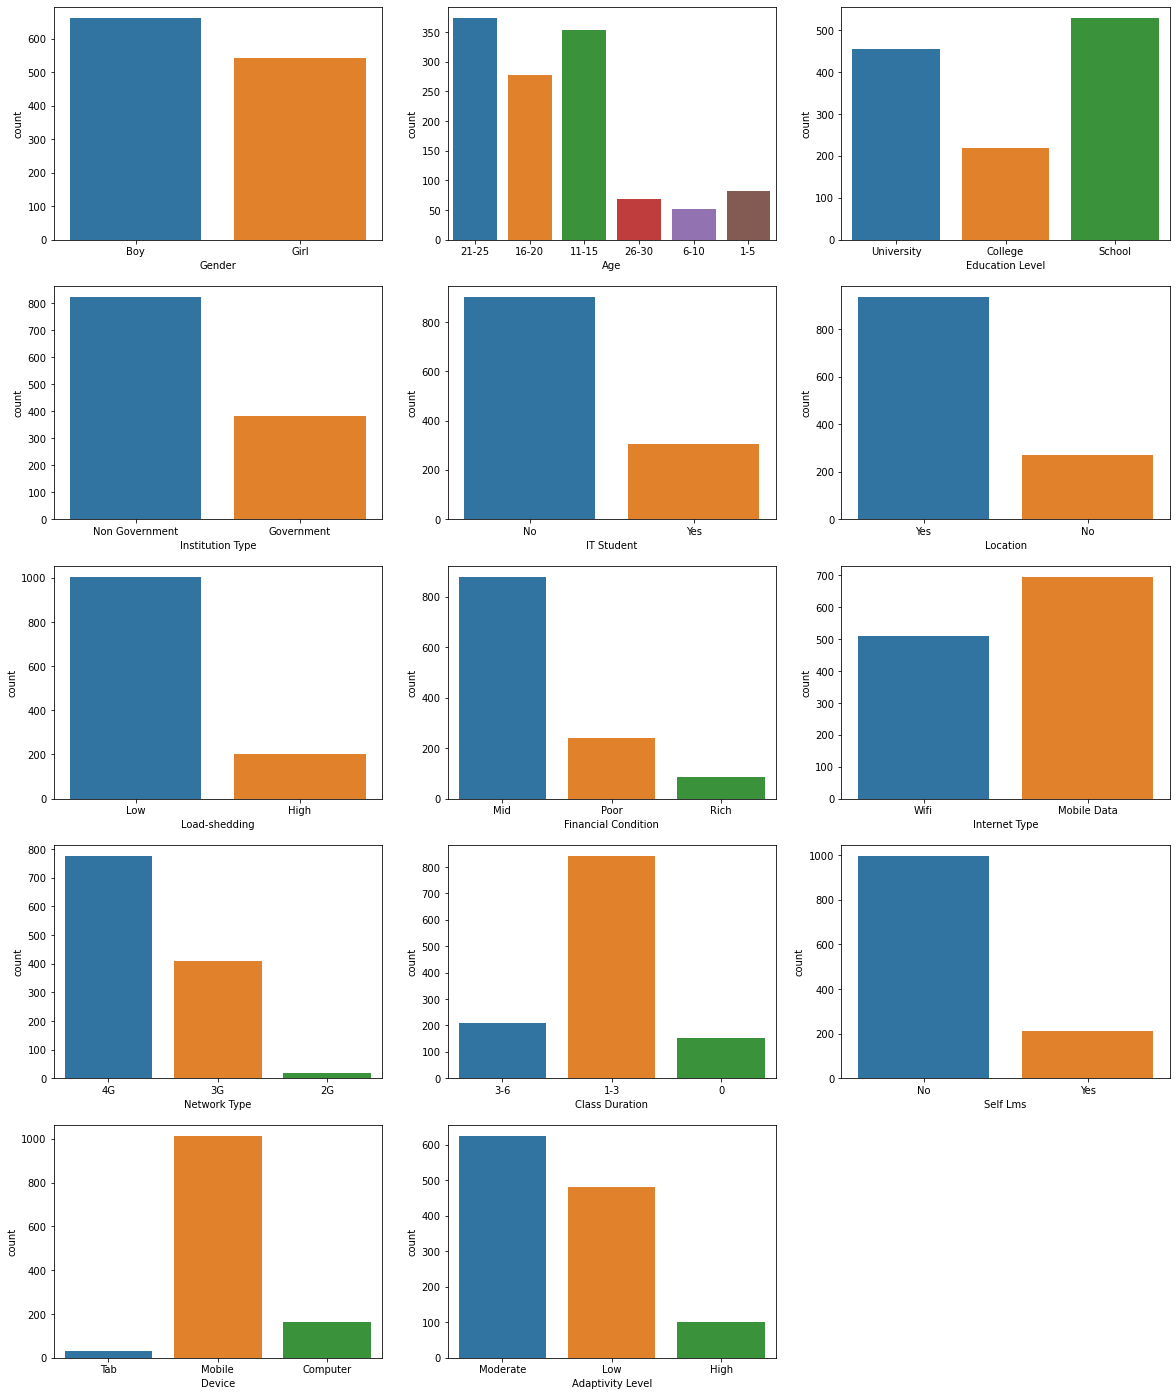

In [84]:
plt.figure(figsize=(20,30))
for i in range(len(df.columns)):
    plt.subplot(6,3,i+1)
    sb.countplot(data=df,x=df.columns[i])

1. Same quantity of subjects taken for not tilt the result to any side.
2. Internet education mostly correspond to the ages 11 - 25 which is a great age range for our nature brain to absorve a new ideas.
3. IT courses are popular in internet education which are make sense due to area angagement.
4. Finance conditions impact on some levels of adaptivity.

## Distribution Plot with Seperate Adaptivity Types

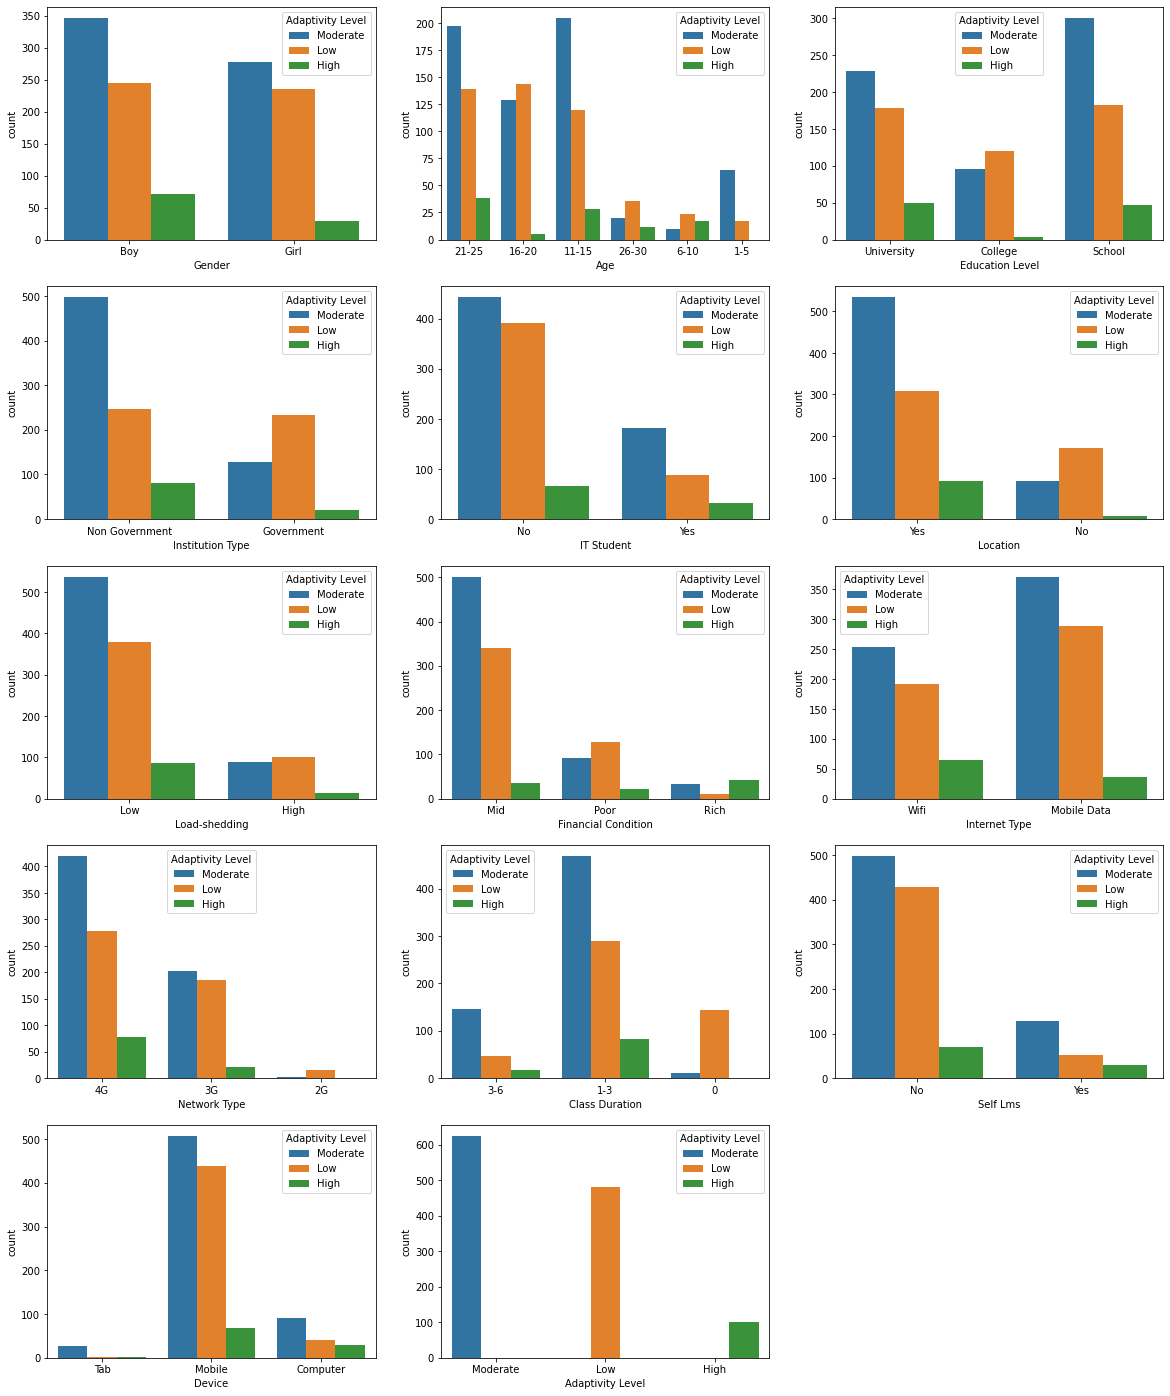

In [94]:
plt.figure(figsize=(20,30))
for i in range(len(df.columns)):
    plt.subplot(6,3,i+1)
    sb.countplot(data=df,x=df.columns[i],hue = "Adaptivity Level")

1. Distribution of adaptive spread equally among the genders.
2. in most of the finance-related features it's obvious to determine that high adaptivity correlated with better financial conditions.
3. High adaptivity in online education mostly in school subjects due to change in attitude to education in the new generation.

# models

## Scale

In [101]:
from sklearn.preprocessing import OrdinalEncoder
scaler = OrdinalEncoder()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE